In [2]:
using Revise
using RMMMDNets

;

┌ Info: Precompiling RMMMDNets [7ea7fd3b-14e3-4223-94d2-c341911ad28e]
└ @ Base loading.jl:1242
┌ Info: Skipping precompilation since __precompile__(false). Importing RMMMDNets [7ea7fd3b-14e3-4223-94d2-c341911ad28e].
└ @ Base loading.jl:1017
┌ Info: Recompiling stale cache file /afs/inf.ed.ac.uk/user/s16/s1672897/.julia/compiled/v1.2/MLToolkit/GGQB9.ji for MLToolkit [519e820e-097c-11e9-2274-1b004aeb0b9b]
└ @ Base loading.jl:1240


In [65]:
grampath = pathof(RMMMDNets) |> splitdir |> first |> splitdir |> first
hyperpath = "$grampath/examples/Hyper.toml"

dataset = begin
#     "gaussian"
#     "ring"
    "3dring"
#     "mnist"
#     "cifar10"
end

modelname = begin
#     "mmdnet"
#     "gan"
#     "rmmmdnet"
    "mmdgan"
end

argdict = parse_toml(hyperpath, dataset, modelname)
args = process_argdict(
    argdict;
    override=(Df=2,),
#     suffix="high_dim"
)

;

┌ Info: Overriding :Df as 10 => 2
└ @ MLToolkit.Scripting /afs/inf.ed.ac.uk/user/s16/s1672897/projects/MLToolkit.jl/src/Scripting/args.jl:40
┌ Info: Args
│   Dhs_g = 100,100
│   act = relu
│   dataset = 3dring
│   sigma = 1
│   Dz = 20
│   batchsize = 200
│   opt = adam
│   norm = false
│   Df = 2
│   n_epochs = 4000
│   actlast = identity
│   beta1 = 0.5
│   modelname = mmdgan
│   Dhs_f = 100,100
│   batchsize_g = 200
│   base = gaussian
│   lr = 5.0e-5
│   seed = 1
└ @ MLToolkit.Scripting /afs/inf.ed.ac.uk/user/s16/s1672897/projects/MLToolkit.jl/src/Scripting/args.jl:45


In [67]:
dataloader, model, modelpath = run_exp(
    args; 
#     initonly=true,
#     model=model,
)

;

┌ Info: Init mmdgan with 33,908 parameters
│   logdir = 3dring/mmdgan/Dhs_g=100,100-act=relu-dataset=3dring-sigma=1-Dz=20-batchsize=200-opt=adam-norm=false-Df=2-n_epochs=4000-actlast=identity-beta1=0.5-modelname=mmdgan-Dhs_f=100,100-batchsize_g=200-base=gaussian-lr=5.0e-5-seed=1/11112019-1-2-34
└ @ RMMMDNets /afs/inf.ed.ac.uk/user/s16/s1672897/projects/GRAM-nets/GRAM.jl/src/RMMMDNets.jl:265
Training 33%|██████████████▎                            |  ETA: 0:17:14m

InterruptException: InterruptException:

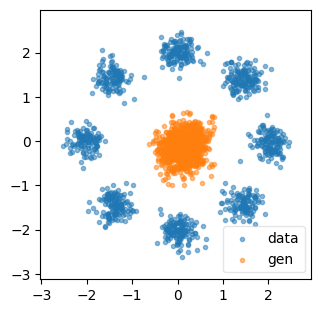

In [90]:
evaluate(model, dataloader).gen

Consider a bivariate Gaussian $p_x(x) = \mathcal{N}(x; [0, 1], [1, 4])$ and a projection function $f$ that project $x$ to $y$ as $y = f(x) = x_1 + x_2$, where $f$ is picked such that we know the exact distribution of $y$ (see next).

It can be seen that $x_1 \sim \mathcal{N}(0, 1)$ and $x_2 \sim \mathcal{N}(0, 4)$ thus $y$ is a sum of two Gaussian distributed random variables thus $y \sim \mathcal{N}(1,5)$.

We claim that the following two expressions, $E_1$ and $E_2$, are equvialent as the second expression can be obtained via invoking LOTUS.

$$
E_1 = \int p_x(x) g(f(x)) dx
$$

$$
E_2 = \int p_y(y) g(y) dy
$$

where $g(y)$ is an arbitary function that ensure the integral is finite.

In order to run a simulation to check our claim, we choose $g(y) = (y - 0.5)^2$.

In [ ]:
using Distributions

In [21]:
p_x = MvNormal([0.0, 1.0], [1.0, 2.0])
p_y = Normal(1.0, sqrt(5.0))
f(x) = sum(x)
g(y) = (y - 0.5) ^ 2

g (generic function with 1 method)

In [22]:
n_mc = 100_000

Ê₁ = mean([g(f(rand(p_x))) for _ in 1:n_mc])
Ê₂ = mean([g(rand(p_y)) for _ in 1:n_mc])

@info "Equivalence checking" Ê₁ Ê₂

┌ Info: Equivalence checking
│   Ê₁ = 5.2162086013128475
│   Ê₂ = 5.236950636267233
└ @ Main In[22]:6
